In [1]:
#add project directory to python path
import sys
sys.path.append("..")
from default import PROJECT_DIRECTORY, DATA_DIRECTORY
#import standard packages
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function, division
%matplotlib inline

##Stellar Mass Functions

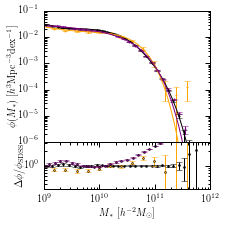

In [17]:
from lss_observations.stellar_mass_functions import LiWhite_2009_phi, Baldry_2011_phi, Yang_2012_phi

phi_1 = LiWhite_2009_phi()
dndm_1 = phi_1.data_table['phi']
err_1 = phi_1.data_table['err']
m_1 = phi_1.data_table['bin_center']

phi_2 = Baldry_2011_phi()
dndm_2 = phi_2.data_table['phi']
err_2 = phi_2.data_table['err']
m_2 = phi_2.data_table['bin_center']

phi_3 = Yang_2012_phi()
dndm_3 = phi_3.data_table['all']
err_3 = phi_3.data_table['all_err']
m_3 = phi_3.data_table['bin_center']

m_sample = np.logspace(8,12,100)

fig = plt.figure(figsize=(3.3,3.3))

#upper panel
rect = 0.2,0.35,0.7,0.55
ax = fig.add_axes(rect)
p1 = ax.errorbar(m_1, dndm_1, yerr=err_1, fmt='o', color='black', ms=2, mec='none')
p2 = ax.errorbar(m_2, dndm_2, yerr=err_2, fmt='o', color='orange', ms=2, mec='none')
p3 = ax.errorbar(m_3*0.7, dndm_3, yerr=err_3, fmt='o', color='purple', ms=2, mec='none')
ax.plot(m_sample, phi_1(m_sample), '-', color='black')
ax.plot(m_sample, phi_2(m_sample), '-', color='orange')
ax.plot(m_sample*0.7, phi_3(m_sample), '-', color='purple')
ax.set_xlim([10**9,10**12])
ax.set_ylim([10**-6,10**-1])
ax.set_yticks([10**-5,10**-4,10**-3,10**-2,10**-1])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel(r'$\phi(M_{*})~[h^{3}{\rm Mpc}^{-3}{\rm dex}^{-1}]$', labelpad=-1)
ax.xaxis.set_visible(False)

#lower panel
rect = 0.2,0.15,0.7,0.2
ax = fig.add_axes(rect)
ax.errorbar(m_1, (dndm_1)/phi_1(m_1), yerr=(err_1)/phi_1(m_1), fmt='o', color='black', ms=2, lw=1)
ax.errorbar(m_2, (dndm_2)/phi_1(m_2), yerr=(err_2)/phi_2(m_2), fmt='o', color='orange', ms=2, lw=1)
ax.errorbar(m_3*0.7, (dndm_3)/phi_1(m_3), yerr=(err_3)/phi_3(m_3), fmt='o', color='purple', ms=2, lw=1)
ax.set_ylim([10**(-0.5),10**(0.5)])
#ax.set_yticks([-0.1,0.0,0.1])
ax.set_xlim([10**9,10**12])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel(r'$\Delta\phi/\phi_{\rm SDSS}$', labelpad=-2)
ax.set_xlabel(r'$M_{*} ~[h^{-2}M_{\odot}]$')

plt.show()

##Stellar Mass Conversions

In [2]:
from SMHM_model_components import Bell_to_Blanton, Kauffmann_to_Blanton, Moustakas_to_Blanton

In [3]:
m_bell = np.logspace(8,12,1000)
m_kauff = np.logspace(8,12,1000)
m_ised = np.logspace(8,12,1000)

mstar_conv = Bell_to_Blanton()
m_blanton_1 = mstar_conv.convert_stellar_mass(stellar_mass = m_bell)

mstar_conv = Kauffmann_to_Blanton()
m_blanton_2 = mstar_conv.convert_stellar_mass(stellar_mass = m_kauff)

mstar_conv = Moustakas_to_Blanton()
m_blanton_3 = mstar_conv.convert_stellar_mass(stellar_mass = m_ised)

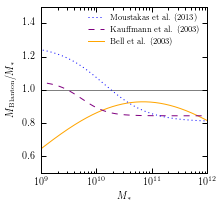

In [5]:
fig = plt.figure(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
plt.plot(np.logspace(8,13,100),np.logspace(8,13,100)*0.0 + 1.0, '-', color='grey')
p1, = plt.plot(m_bell, m_blanton_1/m_bell, '-', color='orange')
p2, = plt.plot(m_kauff, m_blanton_2/m_kauff, '--', color='purple')
p3, = plt.plot(m_ised, m_blanton_3/m_ised, ':', color='blue')
plt.legend([p3,p2,p1],['Moustakas et al. (2013)','Kauffmann et al. (2003)','Bell et al. (2003)'],
           loc='upper right', fontsize=8, frameon=False, numpoints=1)
plt.xscale('log')
plt.xlabel(r'$M_{*}$')
plt.ylabel(r'$M_{\rm Blanton}/M_*$')
plt.xlim([10**9,10**12])
plt.ylim([0.5,1.5])
plt.show()

filepath = PROJECT_DIRECTORY + 'figures/'
filename = 'mstar_fconv'
fig.savefig(filepath+filename+'.pdf', dpi=300)